In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing amazon dataset
ds=pd.read_csv("RatingsAmazon.csv", usecols = ['Review Headline','Star Rating'])
ds

,Review Headline,Star Rating
0,Best Book Ever,5.0
1,researchers from John Hopkins School of Medici...,NaN
2,Michelle,5.0
3,Loved the book,5.0
4,Challenges your assumptions,4.0
...,...,...
15067,Margarethe. Told from the younger sister's per...,NaN
15068,and she uses it to make significant changes in...,0.0
15069,even when I critique this book as its own entity,NaN
15070,This Whirlwind never really gets off the ground,3.0


In [3]:
ds.columns # checking columns of dataset

Index(['Review Headline', 'Star Rating'], dtype='object')

In [4]:
# dropping rows having Nan values
ds_new=ds.dropna()
ds_new

,Review Headline,Star Rating
0,Best Book Ever,5.0
2,Michelle,5.0
3,Loved the book,5.0
4,Challenges your assumptions,4.0
6,Reflections,5.0
...,...,...
15063,Great book,5.0
15066,but I would have liked a little more informati...,3.0
15068,and she uses it to make significant changes in...,0.0
15070,This Whirlwind never really gets off the ground,3.0


In [ ]:
ds_new.dtype

In [5]:
dss= ds_new[(ds_new["Star Rating"] < 6) & (ds_new["Star Rating"]>0)] #selecting columns having ratings between 1 to 5
dss["Ratings"]=dss["Star Rating"].astype(int) # changing dtype to int 
dss["Reviews"]=dss["Review Headline"] # copying reviews to data column same as flipkart
dss.drop(columns=[ "Star Rating","Review Headline"],inplace=True) # dropping columns

<ipython-input-5-3ae4e4551fd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dss["Ratings"]=dss["Star Rating"].astype(int)
<ipython-input-5-3ae4e4551fd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dss["Reviews"]=dss["Review Headline"]
/Users/icg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [7]:
#importing the flipkart dataset
df=pd.read_csv("Ratings.csv",index_col=0)
df.head()

,Reviews,Ratings
0,Just wow!,5
1,Worth the money,4
2,Perfect product!,5
3,Excellent,5
4,Brilliant,5


In [ ]:
# concatenating flipkart and amazon dataset
df=pd.concat([dss,df])
df

# EDA

In [9]:
df.shape  # checking the rows and cols count

(20258, 2)

In [10]:
df.columns  # checking the various cols

Index(['Ratings', 'Reviews'], dtype='object')

In [11]:
df.dtypes   # checking the datatypes of cols

Ratings     int64
Reviews    object
dtype: object

In [12]:
df.describe()

,Ratings
count,20258.000000
mean,4.322441
std,1.122673
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Key Observations here

Count is same for all values . seems there are no null values

In [13]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20258 entries, 0 to 6926
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  20258 non-null  int64 
 1   Reviews  20258 non-null  object
dtypes: int64(1), object(1)
memory usage: 474.8+ KB


In [14]:
df.isnull() # checking for any null values

,Ratings,Reviews
0,False,False
2,False,False
3,False,False
4,False,False
6,False,False
...,...,...
6922,False,False
6923,False,False
6924,False,False
6925,False,False


In [15]:
df.isnull().sum() # null  values column wise counts

Ratings    0
Reviews    0
dtype: int64

<AxesSubplot:>

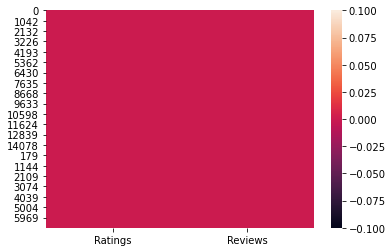

In [16]:
sns.heatmap(df.isnull())

In [17]:
# checking the count of each rating
print(df['Ratings'].value_counts())

5    12939
4     3924
3     1517
1     1134
2      744
Name: Ratings, dtype: int64


# Data Visualization

Univariate Analysis


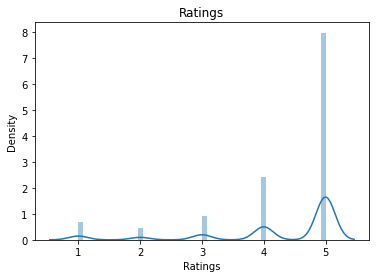

In [51]:
sns.distplot(df["Ratings"])
plt.title("Ratings")
plt.show()

### Above distplot shows the max data is concentrated in 5 star rating

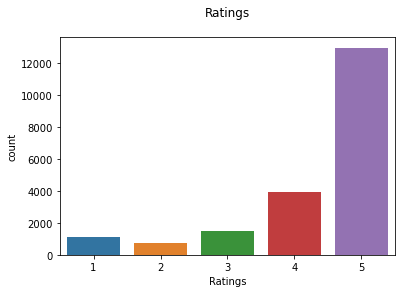

In [52]:
sns.countplot(x ='Ratings', data = df)
plt.title('Ratings\n ')
plt.show()

#it shows that ratings are mainly concentrated in 4 and 5 stars.

# Data Preprocessing 

In [20]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

In [22]:
def clean_review(review_text):
    review_text=re.sub(r'http\$+','',review_text) # removing the url
    review_text=re.sub('[^a-zA-Z]',' ',review_text) #removing Numbers and punctuation
    review_text=str(review_text).lower().replace('\\','').replace('_',' ') #converting all to lower case
    review_text=word_tokenize(review_text) #tokenization
    review_text=[item for item in review_text if item not in stop_words] # removing stop words
    review_text=[lemma.lemmatize(word=w,pos='v') for w in review_text] #lemmatization
    review_text=[i for i in review_text if len(i)>=2] # removing the words having length <2
    return review_text

In [23]:
df['Reviews']=df["Reviews"].apply(lambda x:clean_review(x)) # preprocessing the reviews for further data modelling 

In [24]:
df['Reviews']=[" ".join(review_text) for review_text in df['Reviews'].values] # converting list to string
df

,Ratings,Reviews
0,5,best book ever
2,5,michelle
3,5,love book
4,4,challenge assumptions
6,5,reflections
...,...,...
6922,5,classy product
6923,5,worth every penny
6924,5,fabulous
6925,5,great product


### Encoding text into vectors for further model training

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(smooth_idf=False,max_features=20000,ngram_range=(1,3),analyzer='char')
X=tfid.fit_transform(df["Reviews"])
y=df["Ratings"]

In [27]:
# normalizing the ratings values 
y.value_counts(normalize=True)

5    0.638711
4    0.193701
3    0.074884
1    0.055978
2    0.036726
Name: Ratings, dtype: float64

In [28]:
X.shape

(20258, 5428)

In [29]:
y.shape

(20258,)

# Data Balancing
Imbalanced multiclass classification will give incoorrect accuracy. because rows for 1,2,3 stars are very less as compared to 4,5 stars. For That will do oversampling to balance the data for data modelling.

In [30]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [31]:
# transform the dataset  by oversampling the max rating rows
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

### data modelling

#### RandomForestClassifier

In [32]:
#importing the model training libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=85)

In [38]:
#using algorithms in for loops
model=[MultinomialNB(),LinearSVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  MultinomialNB() is  0.6678844937820558
confusion matrix of  MultinomialNB() is 
 [[1768  432  250  144  244]
 [ 127 2020  210  283  159]
 [  91  338 1787  385  226]
 [  84  194  362 1801  439]
 [  63  137  236  323 2130]]
classification report of  MultinomialNB() is 
               precision    recall  f1-score   support

           1       0.83      0.62      0.71      2838
           2       0.65      0.72      0.68      2799
           3       0.63      0.63      0.63      2827
           4       0.61      0.63      0.62      2880
           5       0.67      0.74      0.70      2889

    accuracy                           0.67     14233
   macro avg       0.68      0.67      0.67     14233
weighted avg       0.68      0.67      0.67     14233

**********************************************************************

Accuracy score of  LinearSVC() is  0.8250544509239093
confusion matrix of  LinearSVC() is 
 [[2504  104  165   37   28]
 [  50 2555  172   17    5]
 [ 

### RandomForestClassifier is performing better with accuracy 90 % and its precision and f1 score are also better than other models . 

In [46]:
# cross validating RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("Accuracy score of " , rfc , "is " , accuracy_score(y_test,y_pred))
print("confusion matrix of " , rfc , "is \n",confusion_matrix(y_test,y_pred))
print("classification report of " , rfc, "is \n",classification_report(y_test,y_pred))
print("**********************************************************************\n")
score=cross_val_score(rfc,X,y,cv=4,scoring='accuracy')
print("Cross Validation Score : ", score,"\n")
print("Mean" , score.mean())
print("Standard Deviation" , score.std())

Accuracy score of  RandomForestClassifier() is  0.9015667814234526
confusion matrix of  RandomForestClassifier() is 
 [[2687   72   44    6   29]
 [  30 2693   66    2    8]
 [  27  170 2546   40   44]
 [  29  105  155 2339  252]
 [  27   25   41  229 2567]]
classification report of  RandomForestClassifier() is 
               precision    recall  f1-score   support

           1       0.96      0.95      0.95      2838
           2       0.88      0.96      0.92      2799
           3       0.89      0.90      0.90      2827
           4       0.89      0.81      0.85      2880
           5       0.89      0.89      0.89      2889

    accuracy                           0.90     14233
   macro avg       0.90      0.90      0.90     14233
weighted avg       0.90      0.90      0.90     14233

**********************************************************************

Cross Validation Score :  [0.8715222  0.89544949 0.89408928 0.91510542] 

Mean 0.8940415961639455
Standard Deviation 0.01543

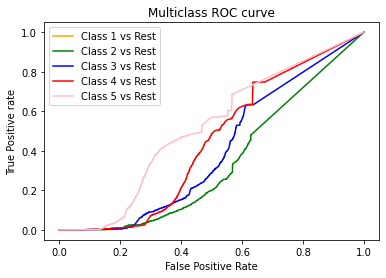

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
clf=OneVsRestClassifier(RandomForestClassifier())
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
pred_prob=clf.predict_proba(x_test)

fpr={}
tpr={}
thres={}
n_class=5
for i in range(n_class):    
    fpr[i], tpr[i], thres[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0],color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], color='red', label='Class 4 vs Rest')
plt.plot(fpr[4], tpr[4],color='pink', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300);  

# Saving the model- Serialization

In [50]:
print(pred,'\t',y_pred)

[4 4 5 ... 2 1 4] 	 [4 4 5 ... 2 1 4]


In [182]:
# saving the prediction model

import pickle
filename="Ratings.pkl"
pickle.dump(pred,open(filename,'wb'))